## Handwritten digit (MNIST) prediction using CNN in Tensorflow with Keras

### Inport libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import RMSprop, SGD, Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Load MNIST dataset from keras library

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = np.max(y_train)+1
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]

print("{} digit classes: ({} to {})".format(num_classes, np.min(y_train), np.max(y_train)))
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

idx = np.random.randint(0, len(y_test), 5)
print('Some sample levels: {}; {}; {}; {}; {}'.format(y_test[idx[0]], y_test[idx[1]], y_test[idx[2]],
                                                      y_test[idx[3]], y_test[idx[4]]))

10 digit classes: (0 to 9)
60000 train samples
10000 test samples
Some sample levels: 7; 5; 4; 6; 8


### Display sample training images

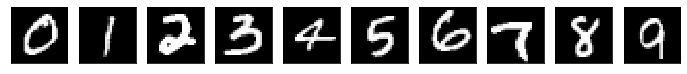

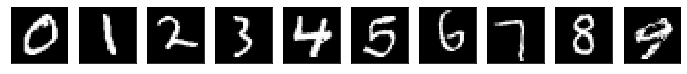

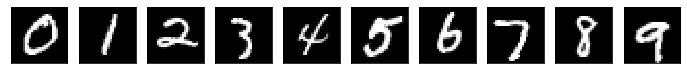

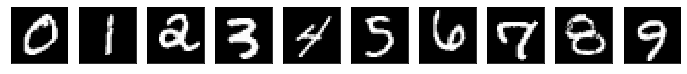

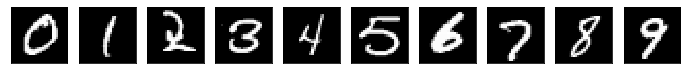

In [3]:
for j in range(5):
    fig=plt.figure(figsize=(12,12))
    rows = 1
    cols = 10
    for i in range(1,rows*cols+1):
        img = i
        while y_train[img] != i-1: 
            img = np.random.randint(len(x_train))
        fig.add_subplot(rows, cols, i)
        plt.imshow(x_train[img].reshape((28, 28)).astype(int), cmap=plt.get_cmap('gray'))
        plt.xticks([]), plt.yticks([])

### Display sample test images

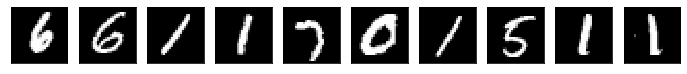

In [4]:
fig=plt.figure(figsize=(12,12))
rows = 1
cols = 10
for i in range(1,rows*cols+1):
    img = np.random.randint(len(x_train))
    fig.add_subplot(rows, cols, i)
    plt.imshow(x_train[img].reshape((28, 28)).astype(int), cmap=plt.get_cmap('gray'))
    plt.xticks([]), plt.yticks([])

### Reshape dataset for CNN layer

In [5]:
# The original dataset has the shape of 60000 X 28 X 28 and "float64" type
# Reshape this of None X rowsX cols X channel i.e 60000 X 28 X 28 X 1
# Also convert them to "float32" type to compatible in Keras 
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

print("x_train shape: ", x_train.shape)

x_train shape:  (60000, 28, 28, 1)


### One hot encoding

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Some sample representation of one hot encoding

In [7]:
idx = np.random.randint(0, len(y_test), 5)
print('Representation of levels after one hot encoding:')
for i in idx:
    print(np.argmax(y_test[i]), ':', y_test[i])

Representation of levels after one hot encoding:
5 : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7 : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
3 : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
0 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


### Build the CNN squential model

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
__________

### Hyperparameter and complie the model

In [9]:
lr = 0.001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=lr),
              metrics=['accuracy'])

### Train the model

In [10]:
batch_size = 128
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1872 - acc: 0.9397 - val_loss: 0.0464 - val_acc: 0.9851
Epoch 2/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0516 - acc: 0.9843 - val_loss: 0.0300 - val_acc: 0.9911
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0362 - acc: 0.9888 - val_loss: 0.0252 - val_acc: 0.9908
Epoch 4/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0294 - acc: 0.9907 - val_loss: 0.0252 - val_acc: 0.9922
Epoch 5/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0243 - acc: 0.9927 - val_loss: 0.0199 - val_acc: 0.9937
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0214 - acc: 0.9932 - val_loss: 0.0187 - val_acc: 0.9943
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0184 - acc: 0.9941 - val_loss: 0.0241 - val_ac

### Save the model

In [11]:
import os
folder_name = 'weights'
model_name = 'mnist_cnn.h5'

folder_path = os.path.join(os.getcwd(), folder_name)
model_path = os.path.join(folder_path, model_name)

if not os.path.exists(folder_path):
    os.mkdir(folder_path)
model.save(model_path)
print('Model saved at %s ' % model_path)

Model saved at C:\Users\Fashiar\Research\Machine_Learning\weights\mnist_cnn.h5 


### Evaluate the model

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024946499275391398
Test accuracy: 0.993


### Test the model with new set of examples

In [13]:
# Load the model
from keras.models import load_model
loaded_model = load_model(model_path)
print('%s model loaded sucessfully !!!' %model_name)

mnist_cnn.h5 model loaded sucessfully !!!


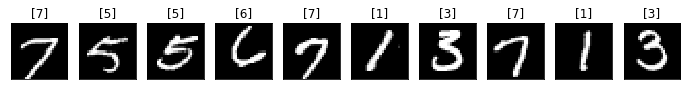

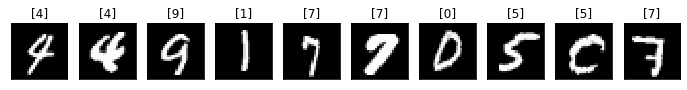

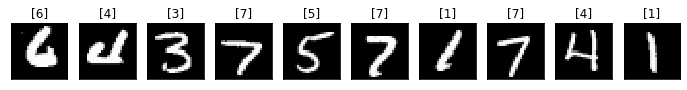

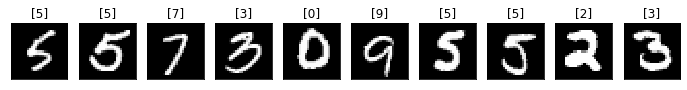

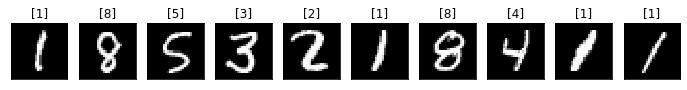

In [16]:
# dispaly the prediciton result of 10 random examples
for j in range(5):
    idx = np.random.randint(0, len(x_test), 10)
    fig=plt.figure(figsize=(12,12))
    row = 1
    col = 10
    for i in range(1, row*col+1):
        img = ((x_test[idx[i-1]]*255.0).reshape(28,28)).astype(int)
        pred = loaded_model.predict_classes(x_test[idx[i-1]].reshape(1,28,28,1))

        fig.add_subplot(row, col, i)
        plt.imshow(img, cmap="gray")
        plt.title(pred)
        plt.xticks([])
        plt.yticks([])